# EDA for Stock Sentiment Prediction

In [27]:
# import key libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob 
import string
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [28]:
# load the stock news data
stock_df = pd.read_csv("stock_sentiment.csv") 
stock_df


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


Text         0
Sentiment    0
dtype: int64


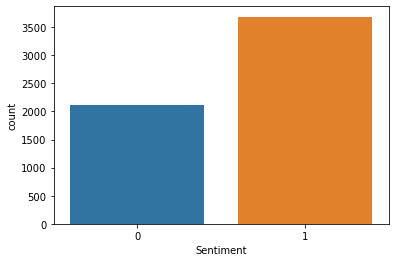

In [29]:
print(stock_df.isnull().sum())
sns.countplot(x=stock_df['Sentiment'])

## Removing punctuation and stopwords

In [30]:
print(string.punctuation)

# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

stock_df.head(5)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


In [31]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['https','from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'and'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

stock_df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdem.arisoy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


## Word Cloud after stopwords removed

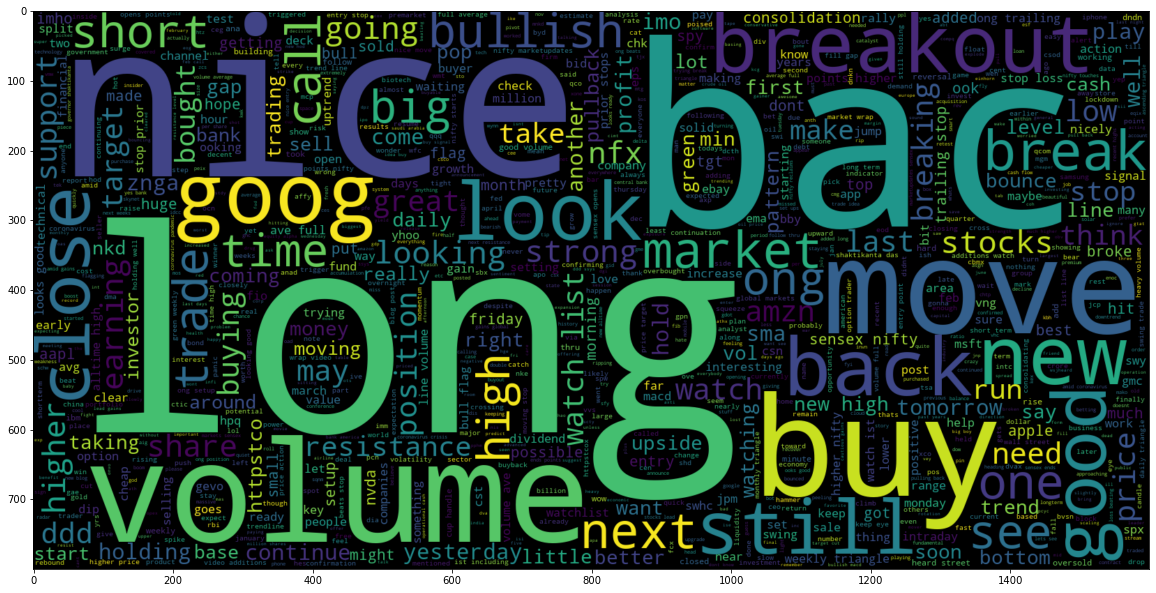

In [32]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

## Number of words distribution

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdem.arisoy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


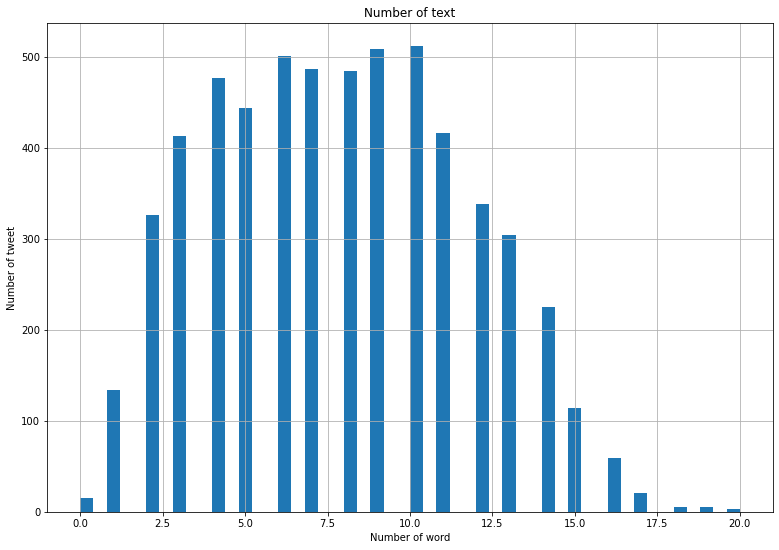

In [33]:
nltk.download('punkt')
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]

plt.figure(figsize=(13,9))
plt.hist(tweets_length, bins = 50)
plt.title(f"Number of text")
plt.xlabel("Number of word")
plt.ylabel("Number of tweet")
plt.grid(True)
plt.show()


In [34]:
## Polarity

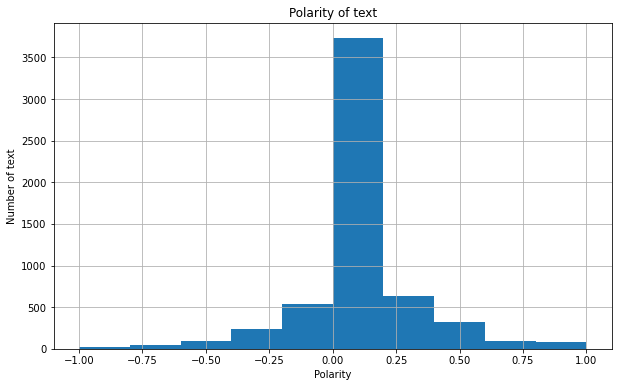

In [35]:
# ---- Show the polarities repartition

stock_df['polarity'] = stock_df['Text Without Punc & Stopwords Joined'].map(lambda text: TextBlob(text).sentiment.polarity)

plt.figure(figsize=(10,6))
stock_df['polarity'].hist()
plt.xlabel("Polarity")
plt.ylabel("Number of text")
#plt.savefig("polarity.png")
plt.title("Polarity of text")
plt.grid(True)
plt.show()


## Top 20 words in text before removing stopwords

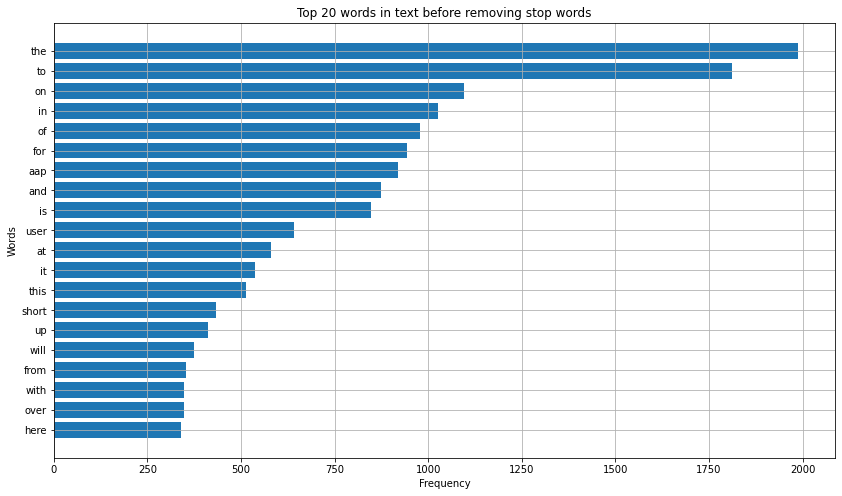

In [36]:
number=20

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(stock_df['Text Without Punctuation'], number)

df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'])

plt.figure(figsize=(14,8))
plt.barh(df1['ReviewText'],df1['count'])
plt.ylabel("Words")
plt.xlabel("Frequency")
plt.title("Top %d words in text before removing stop words" %(number))
plt.grid(True)

## Top 20 words in text after removing stopwords

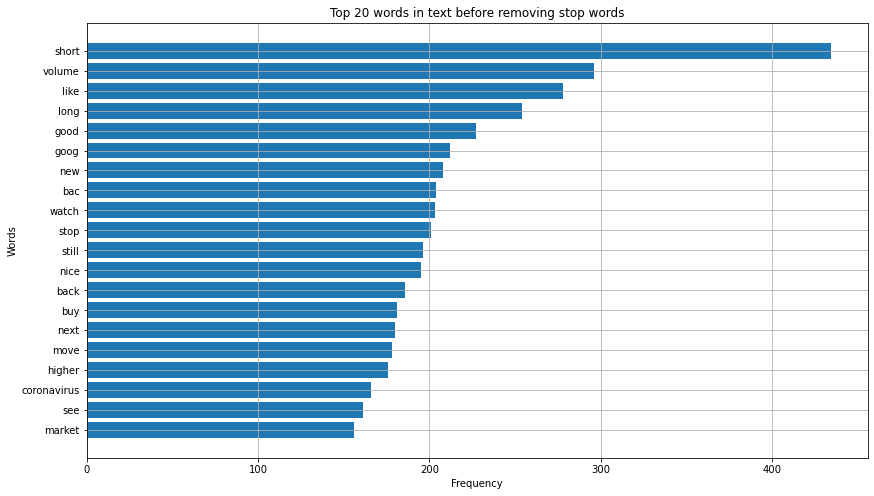

In [37]:
number=20

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(stock_df['Text Without Punc & Stopwords Joined'], number)

df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'])

plt.figure(figsize=(14,8))
plt.barh(df1['ReviewText'],df1['count'])
plt.ylabel("Words")
plt.xlabel("Frequency")
plt.title("Top %d words in text before removing stop words" %(number))
plt.grid(True)

## Top 20 two words sequence in text after removing stopwords

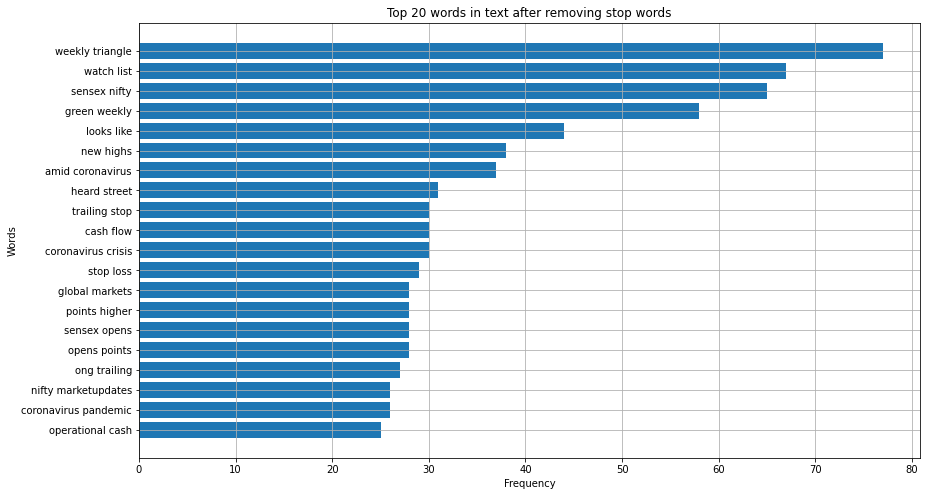

In [38]:
number=20

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(stock_df['Text Without Punc & Stopwords Joined'], 20)

df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'])
plt.figure(figsize=(14,8))

plt.barh(df3['ReviewText'],df3['count'])
plt.ylabel("Words")
plt.xlabel("Frequency")
plt.title("Top %d words in text after removing stop words" %(number))
plt.grid(True)

## Top 20 three words sequence in text after removing stopwords

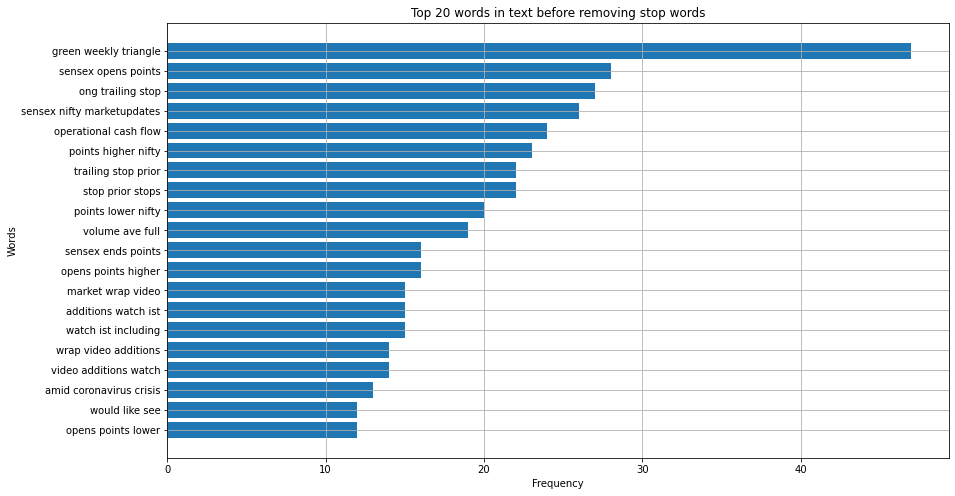

In [39]:
number=20


def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(stock_df['Text Without Punc & Stopwords Joined'], 20)

df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count']).sort_values(by=['count'])
plt.figure(figsize=(14,8))

plt.barh(df4['ReviewText'],df4['count'])
plt.ylabel("Words")
plt.xlabel("Frequency")
plt.title("Top %d words in text before removing stop words" %(number))
plt.grid(True)